##### EDA(Exploratory Data Analysis)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:/Users/HP/PCOD-DETECTION/data/processed/processed_data.csv")

In [5]:
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [7]:
non_numeric_cols=df.select_dtypes(include='object').columns
print("Non numeric columns:",list(non_numeric_cols))

for col in non_numeric_cols:
    print(f"\n{col} unique values:")
    print(df[col].unique())

Non numeric columns: ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']

II    beta-HCG(mIU/mL) unique values:
['1.99' '494.08' '801.45' '100.51' '158.51' '1214.23' '91.55' '749.98'
 '218.65' '13' '610.63' '4490.18' '11.24' '15' '768.03' '12' '10' '20'
 '30.66' '1455' '497.41' '167' '9.83' '141.06' '528.5' '177.57' '65.03'
 '173.66' '161.49' '3.98' '756.61' '255.02' '273.7' '14.46' '145.89'
 '100.09' '110.17' '174.37' '75.51' '3893.06' '600.23' '3350.19' '97.63'
 '14.4' '2' '177.58' '12.17' '25.3' '100.2' '479.66' '1.9' '586.06'
 '1.99.' '2.8' '15.36' '54.08' '152.13' '3.05' '201.36' '16069.69' '57.08'
 '232.71' '23.5' '180.3' '102.3' '481.3' '563.8' '4.32' '230.5' '155.3'
 '3.888' '523.6' '1.65' '3.83' '569.1' '236.5' '896.6' '2.58' '569.3'
 '108.66' '3.99' '121.8' '122.58' '355.28' '122.3' '596.2' '588.7' '147.6'
 '12.37' '144.63' '475.04' '515.53' '99.69' '70.42' '342.91' '148.52'
 '272.78' '355.51' '150.91' '391.46' '464.12' '41.77' '1390.58' '213.83'
 '45.9' '18.36' '154.48' '25000' '638.52

In [9]:
# Clean beta-HCG: remove all non-digit/dot characters, fix extra dots
df["II    beta-HCG(mIU/mL)"] = df["II    beta-HCG(mIU/mL)"].str.strip().str.replace(r"[^\d.]", "", regex=True)
df["II    beta-HCG(mIU/mL)"] = df["II    beta-HCG(mIU/mL)"].str.replace(r"\.+$", "", regex=True)  # remove trailing dots
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce")

# Clean AMH: same treatment
df["AMH(ng/mL)"] = df["AMH(ng/mL)"].str.strip().str.replace(r"[^\d.]", "", regex=True)
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce")


In [10]:
df.dropna(subset=["II    beta-HCG(mIU/mL)", "AMH(ng/mL)"], inplace=True)


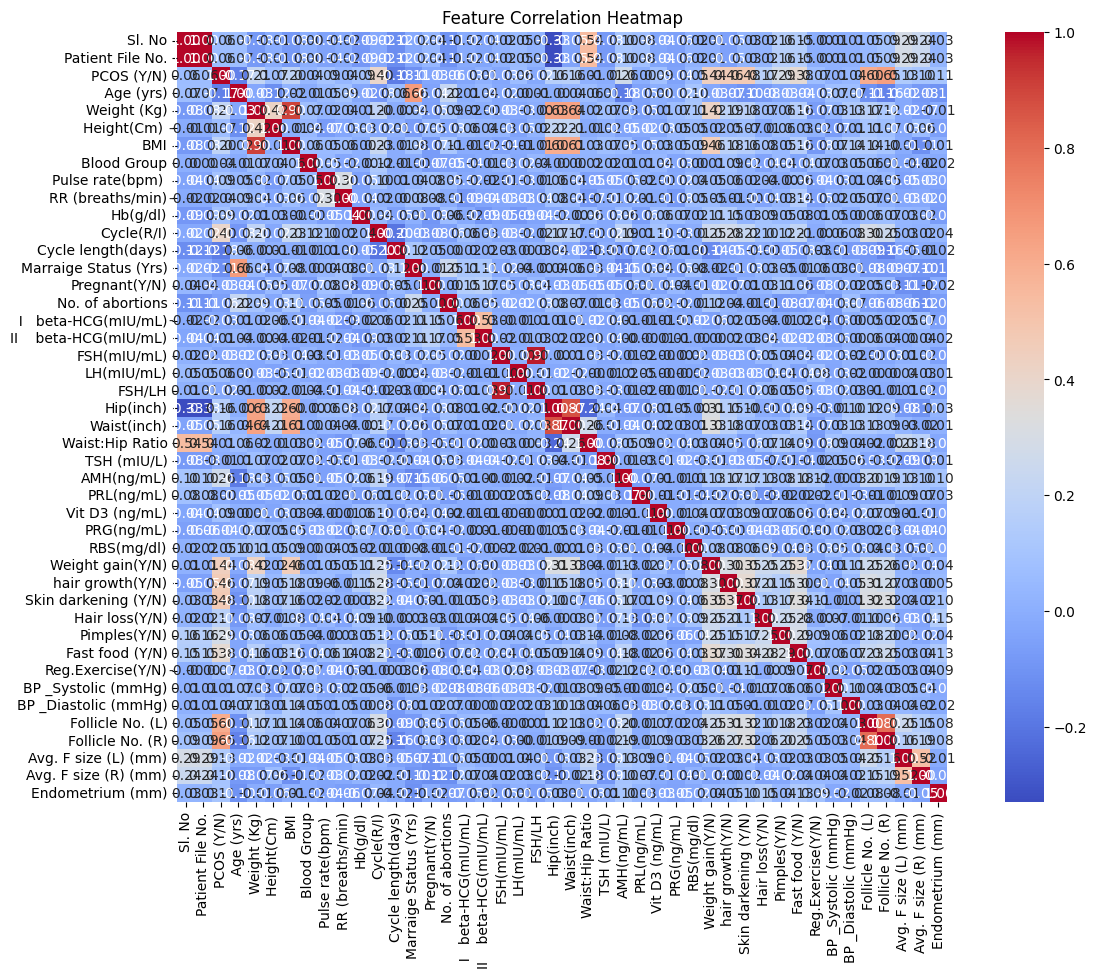

In [11]:
corr_matrix=df.corr(numeric_only=True)

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm",square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
print("Remaining non-numeric columns:")
print(df.select_dtypes(include='object').columns.tolist())

Remaining non-numeric columns:
[]


##### Save Cleaned Dataset (for further use)

In [13]:
import pandas as pd

# Load original data
df = pd.read_csv("C:/Users/HP/PCOD-DETECTION/data/processed/processed_data.csv")

# Clean the two problematic columns
df["II    beta-HCG(mIU/mL)"] = df["II    beta-HCG(mIU/mL)"].astype(str).str.strip().str.replace(r"[^\d.]", "", regex=True)
df["II    beta-HCG(mIU/mL)"] = df["II    beta-HCG(mIU/mL)"].str.replace(r"\.+$", "", regex=True)
df["II    beta-HCG(mIU/mL)"] = pd.to_numeric(df["II    beta-HCG(mIU/mL)"], errors="coerce")

df["AMH(ng/mL)"] = df["AMH(ng/mL)"].astype(str).str.strip().str.replace(r"[^\d.]", "", regex=True)
df["AMH(ng/mL)"] = pd.to_numeric(df["AMH(ng/mL)"], errors="coerce")

# Drop rows with NaNs in these columns
df.dropna(subset=["II    beta-HCG(mIU/mL)", "AMH(ng/mL)"], inplace=True)

# Save the cleaned dataset
df.to_csv("C:/Users/HP/PCOD-DETECTION/data/processed/cleaned_data.csv", index=False)
print("✅ Cleaned dataset saved successfully.")


✅ Cleaned dataset saved successfully.


##### Plotting Boxplots of Features vs PCOS

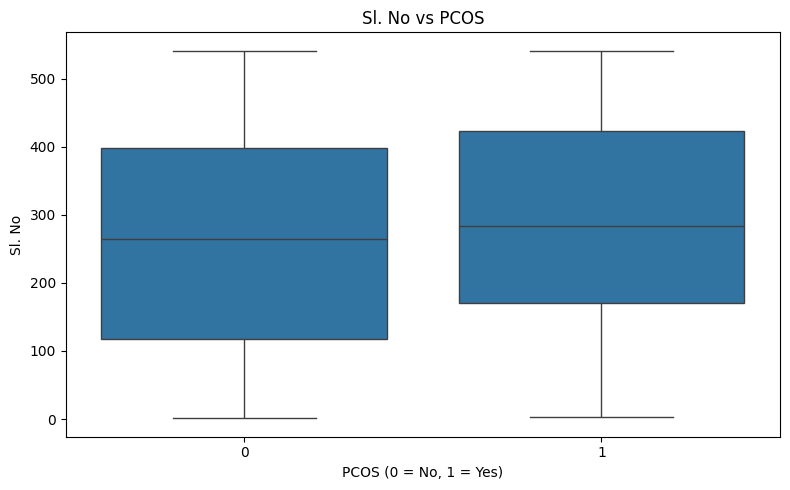

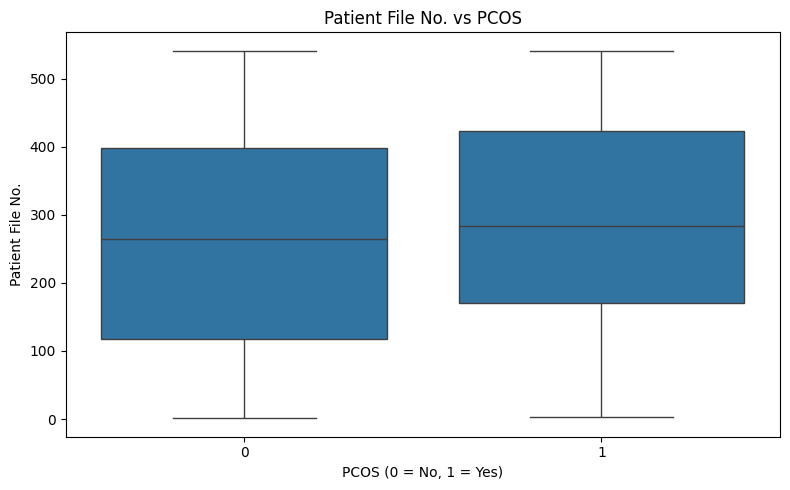

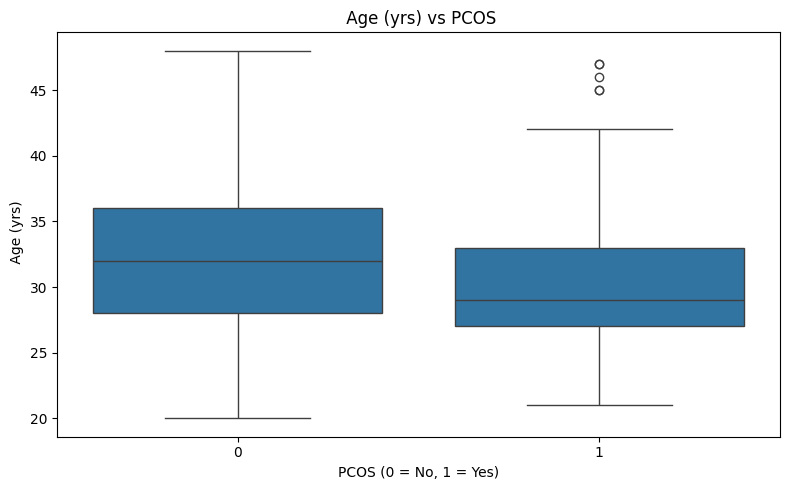

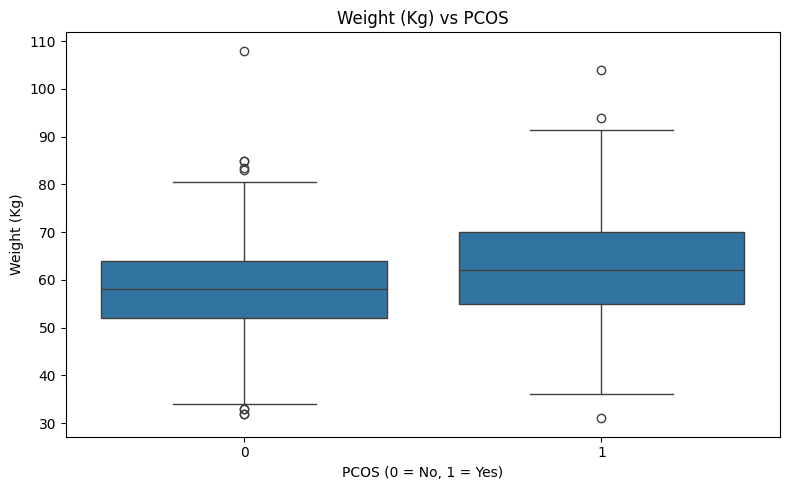

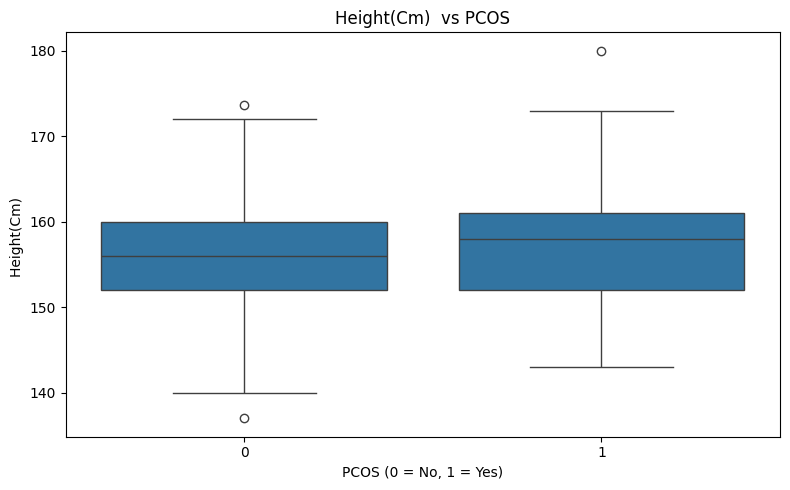

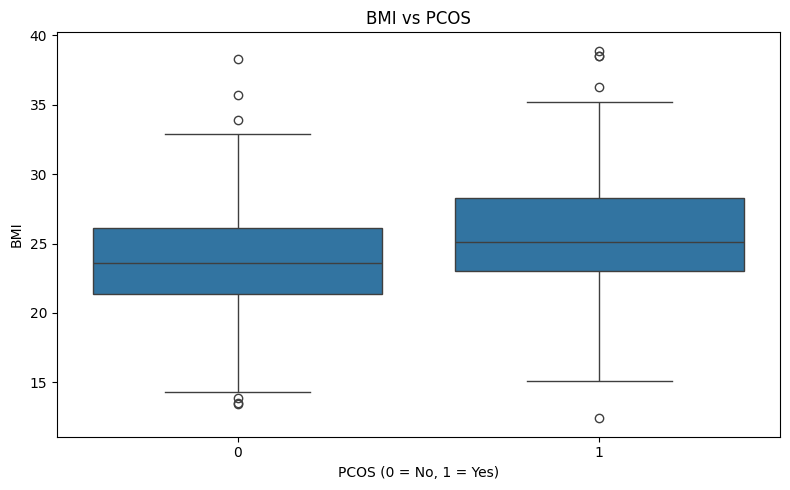

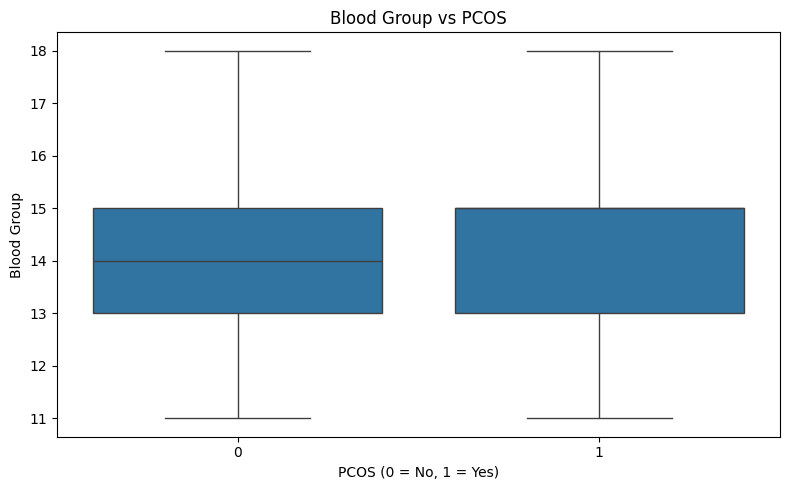

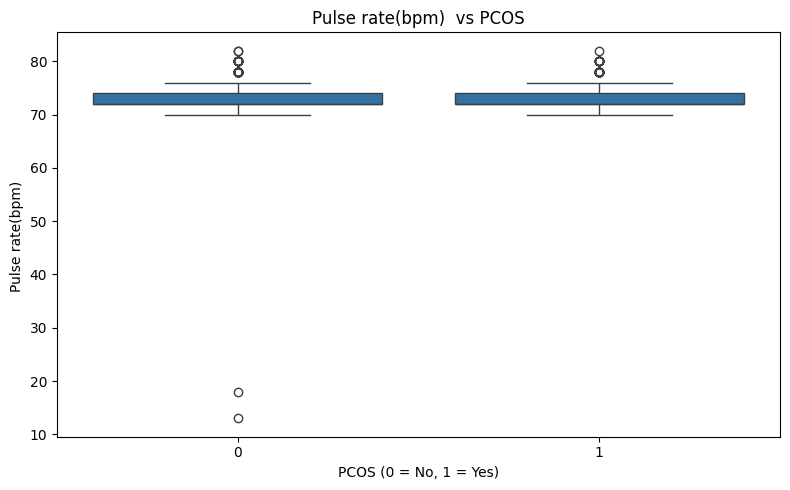

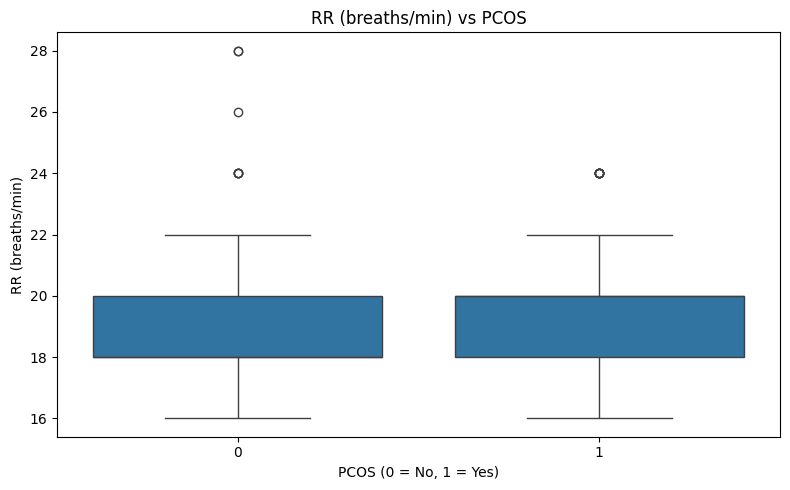

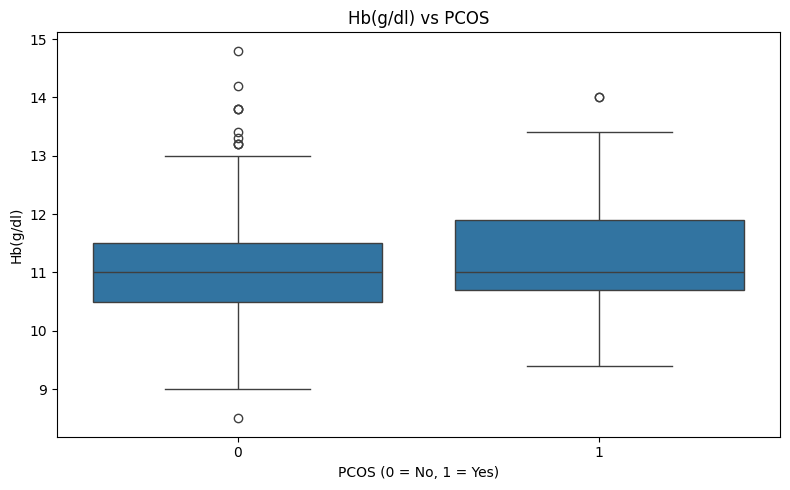

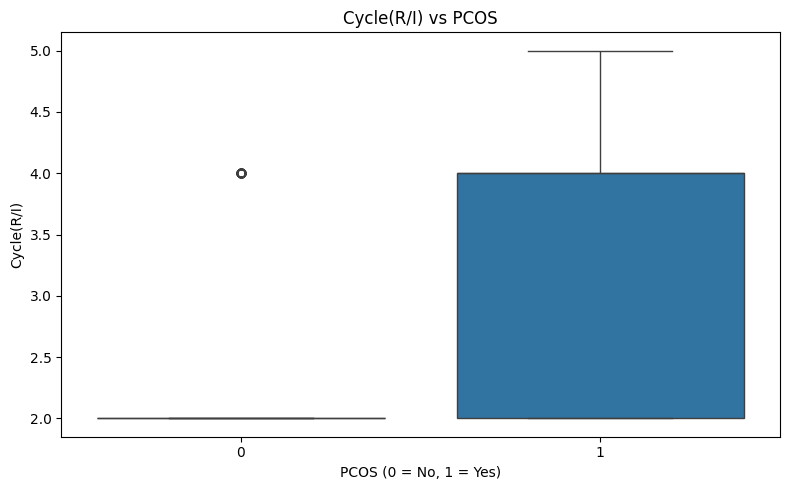

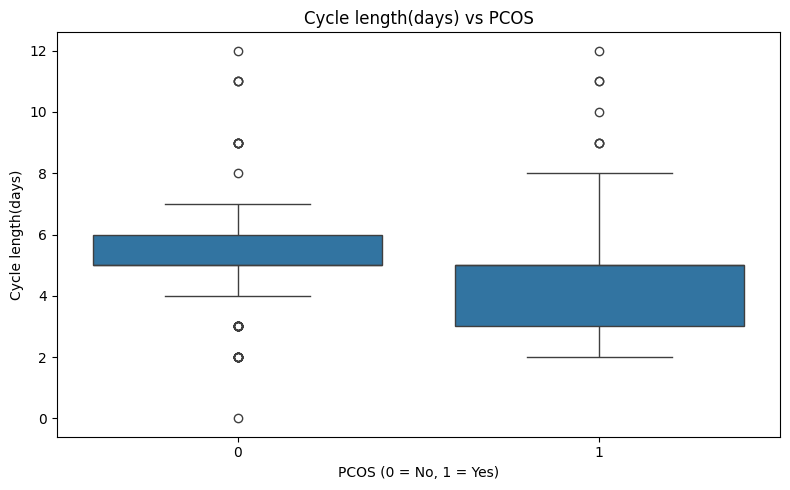

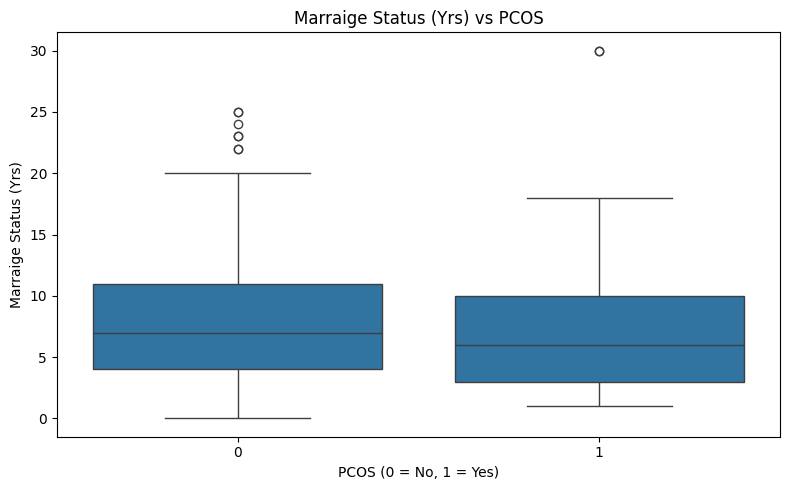

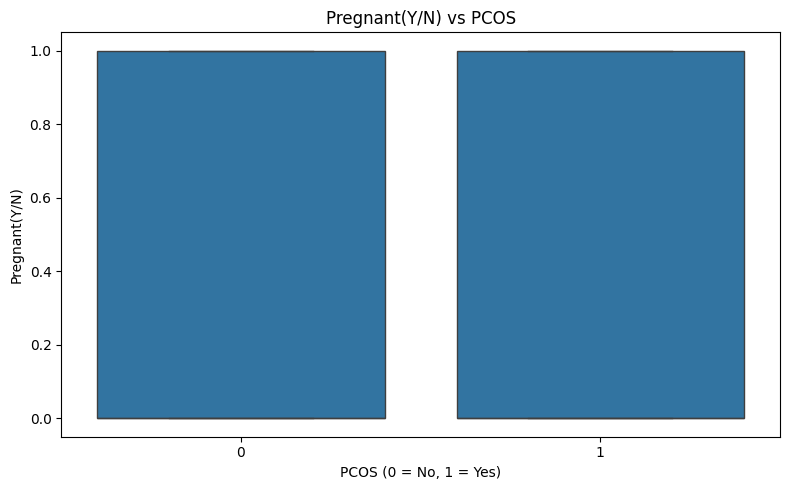

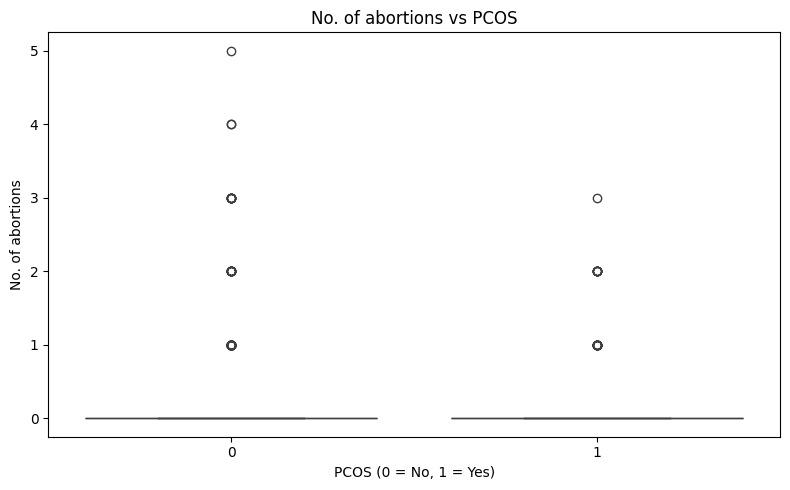

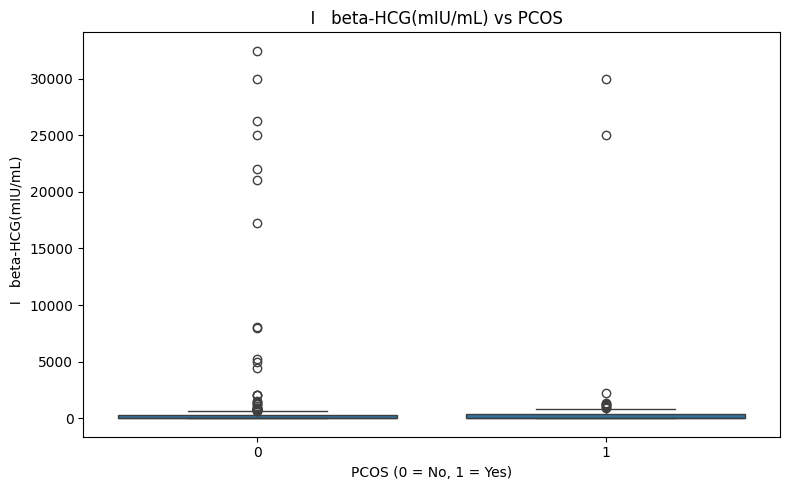

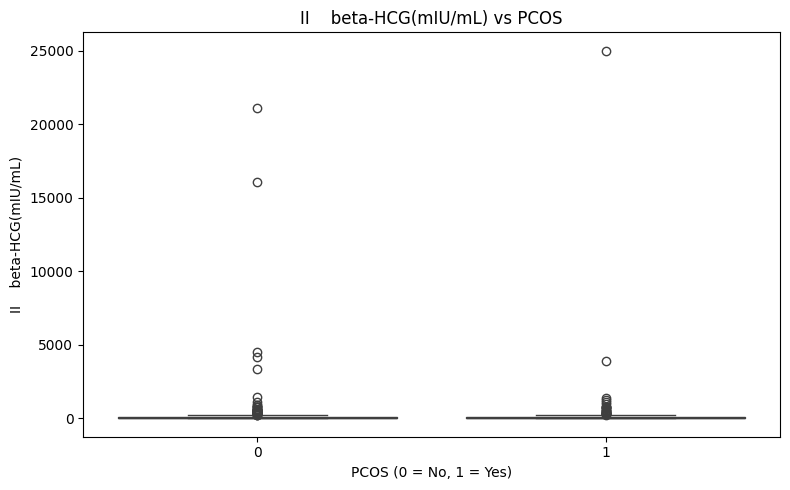

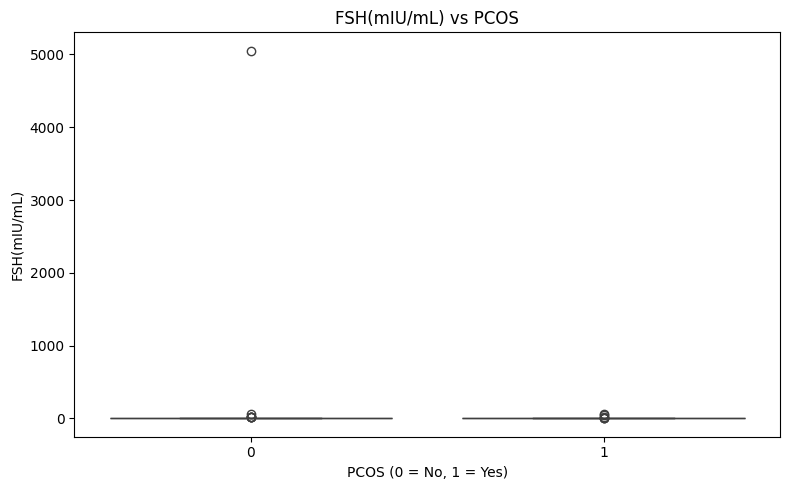

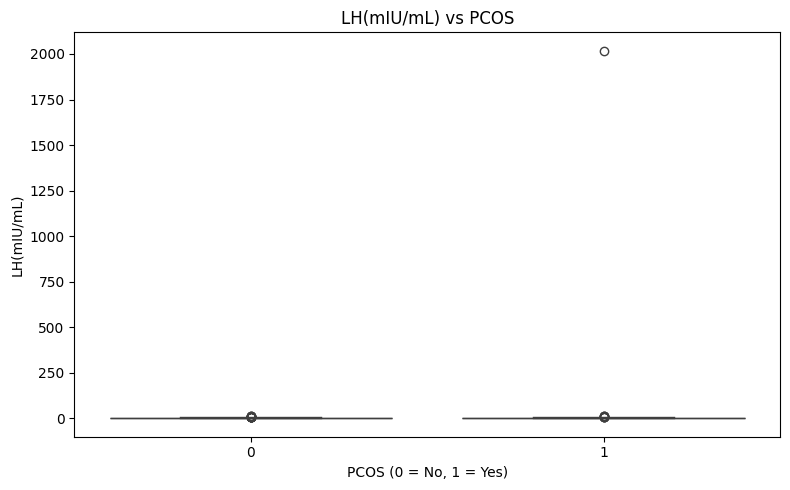

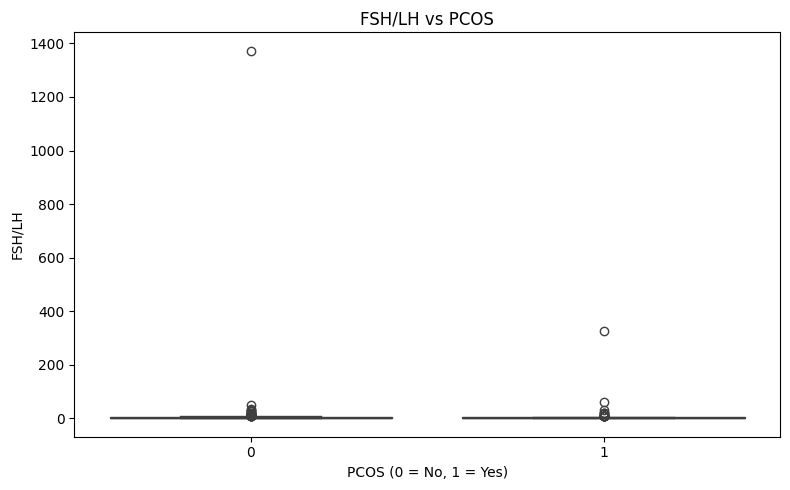

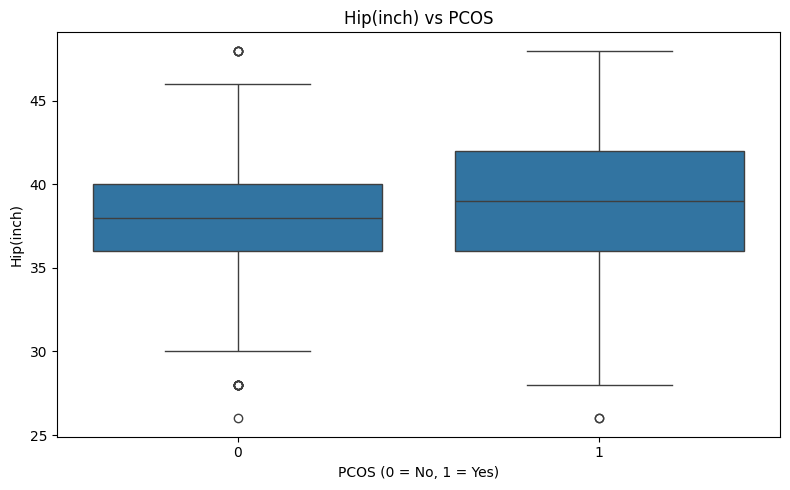

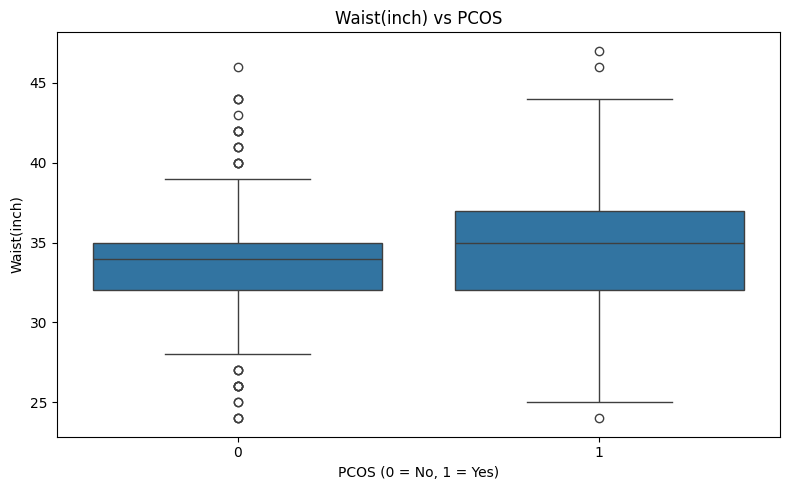

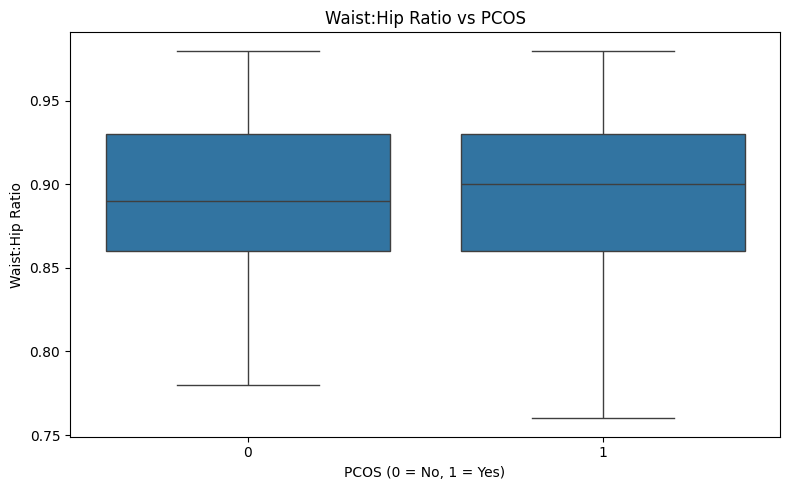

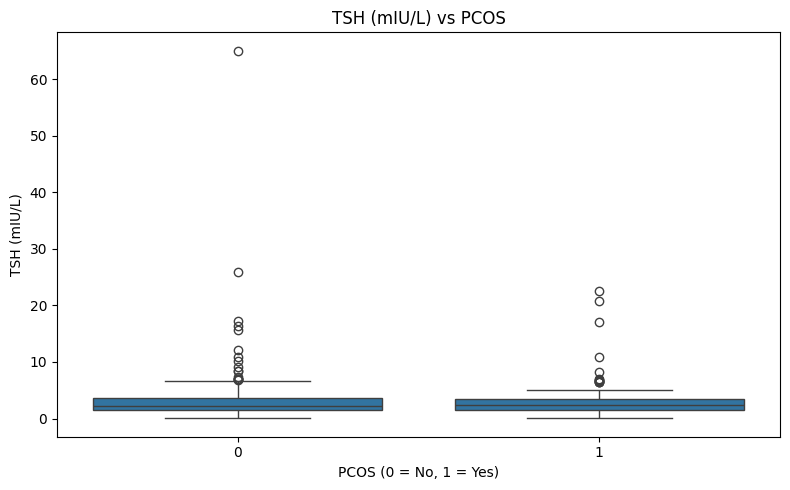

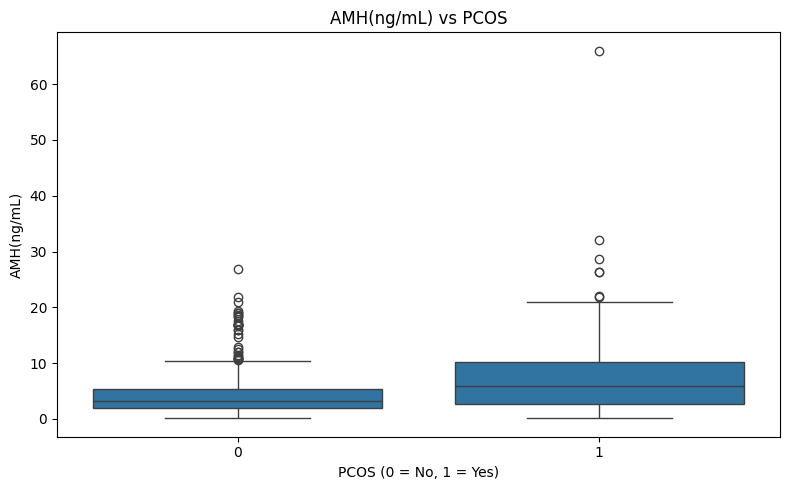

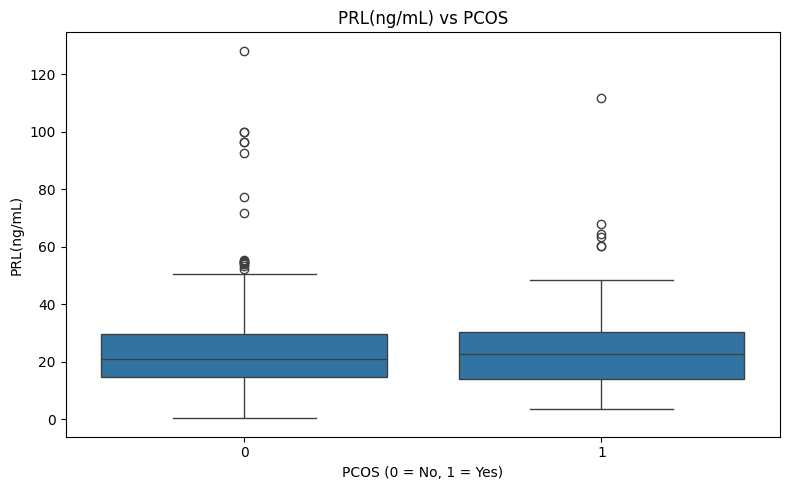

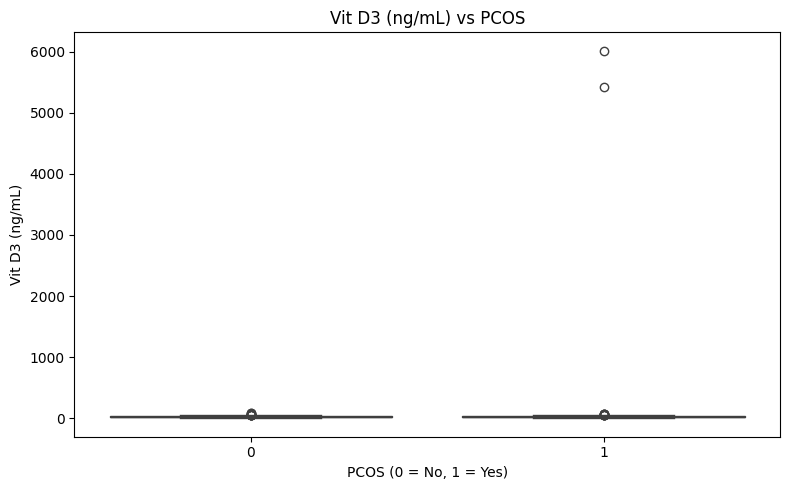

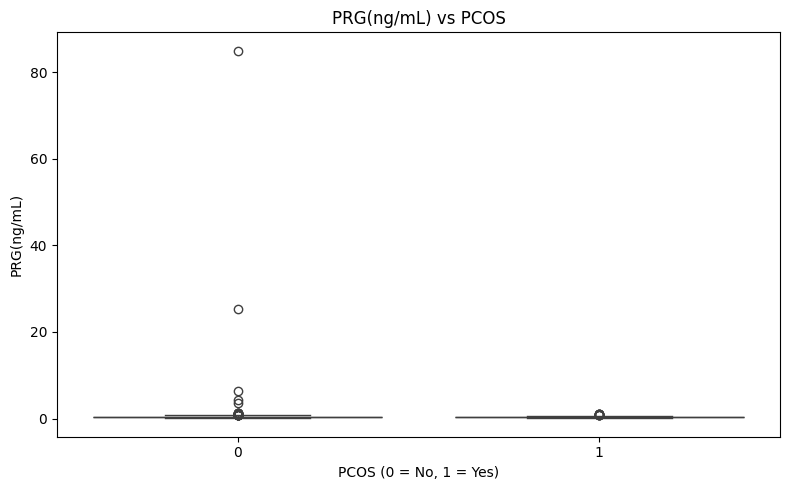

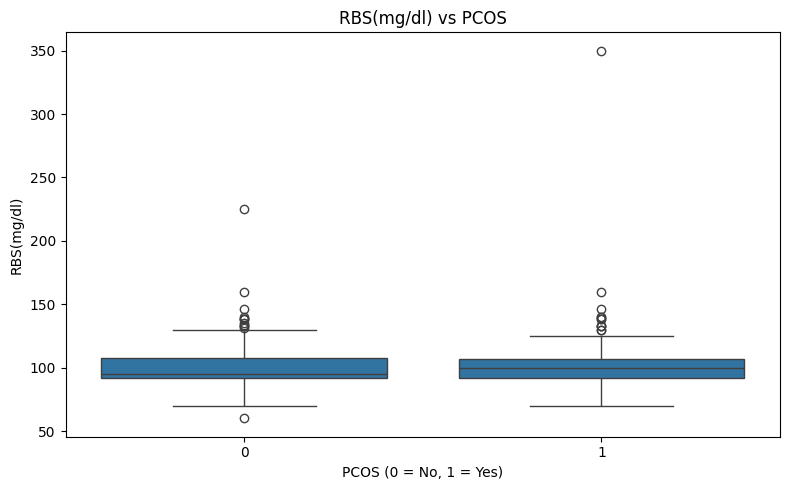

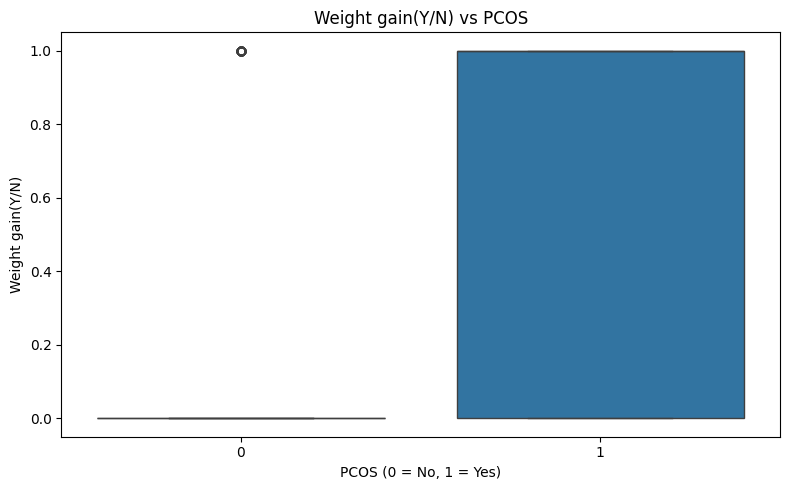

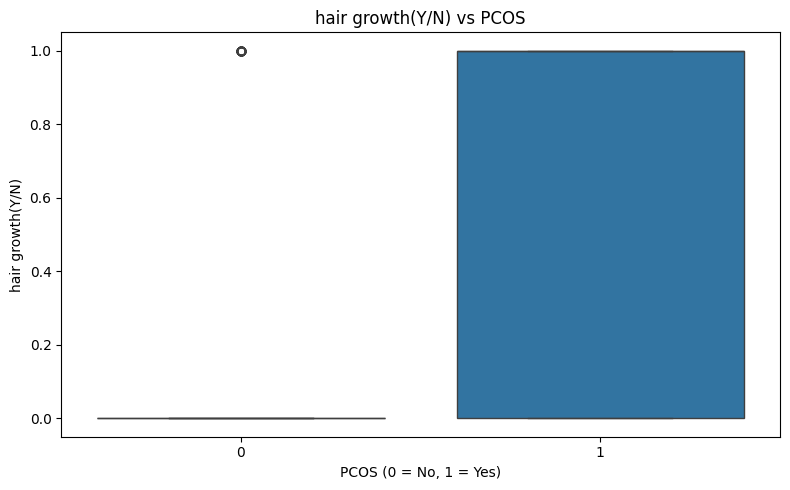

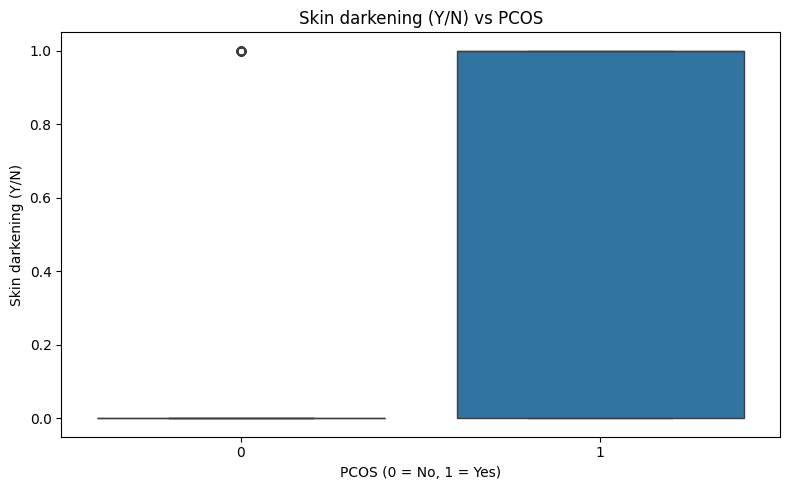

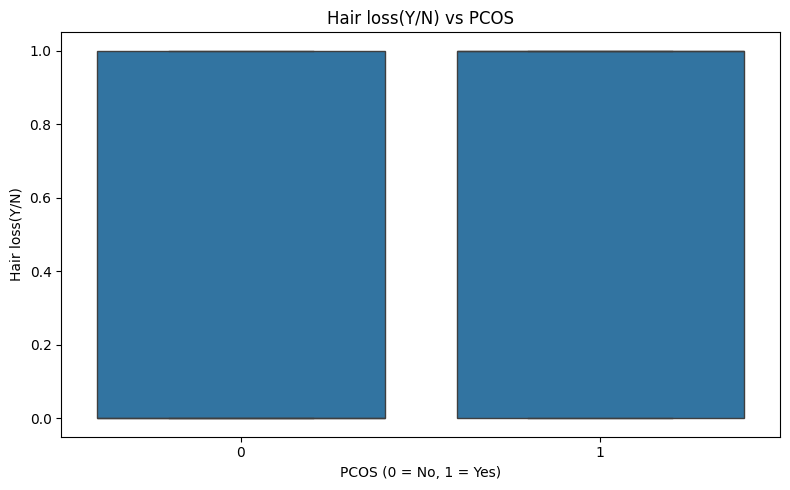

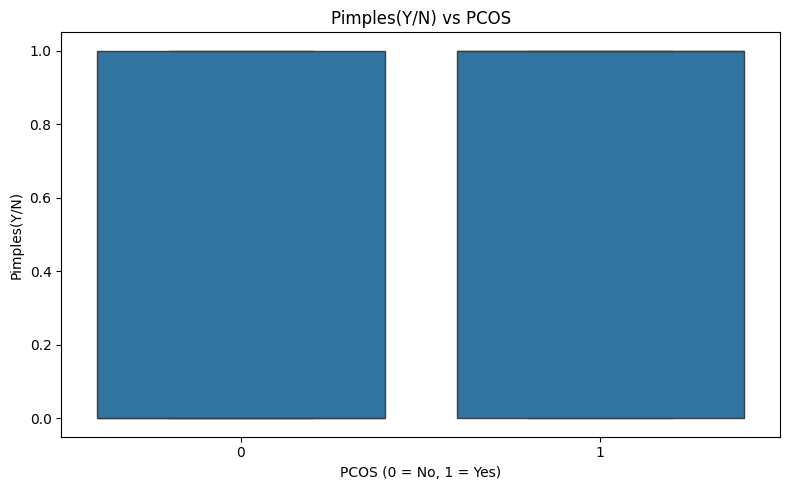

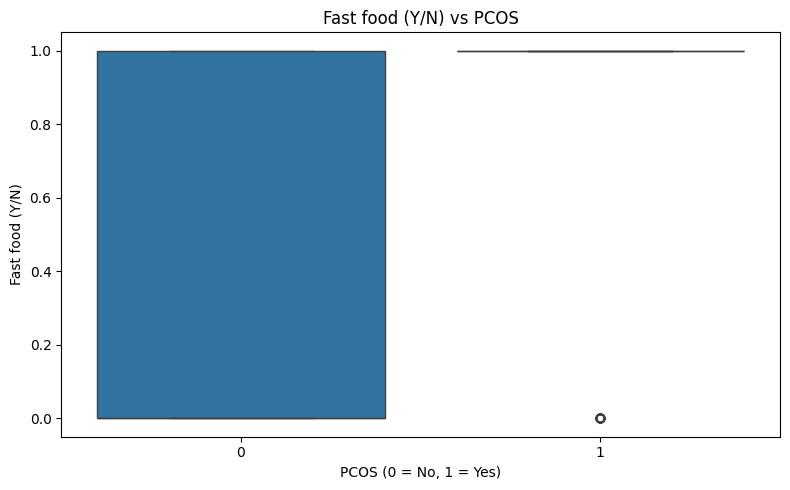

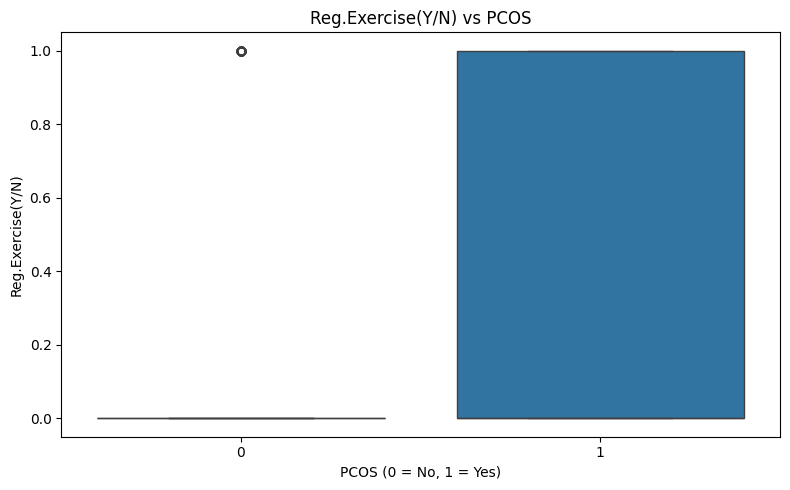

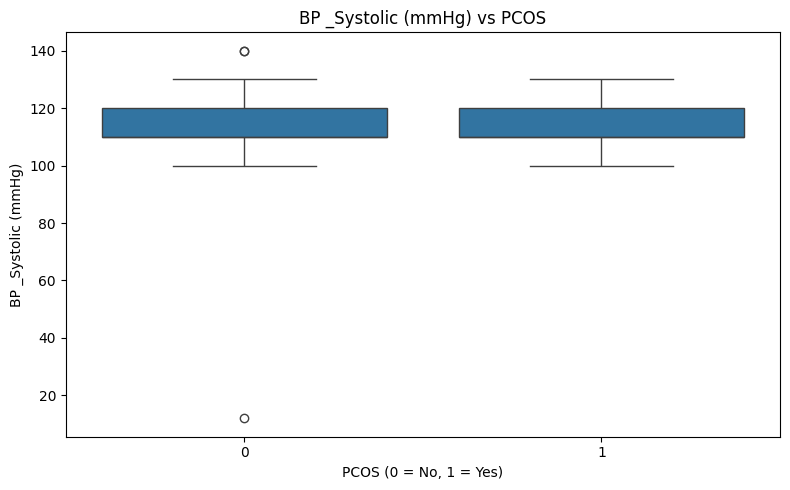

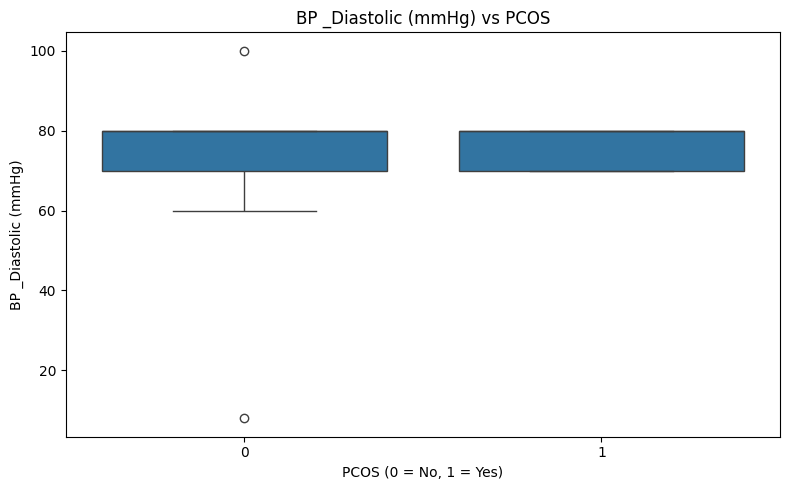

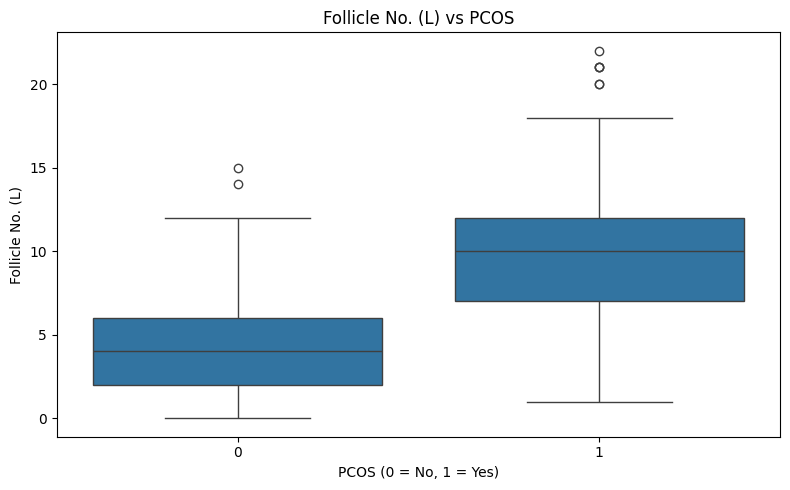

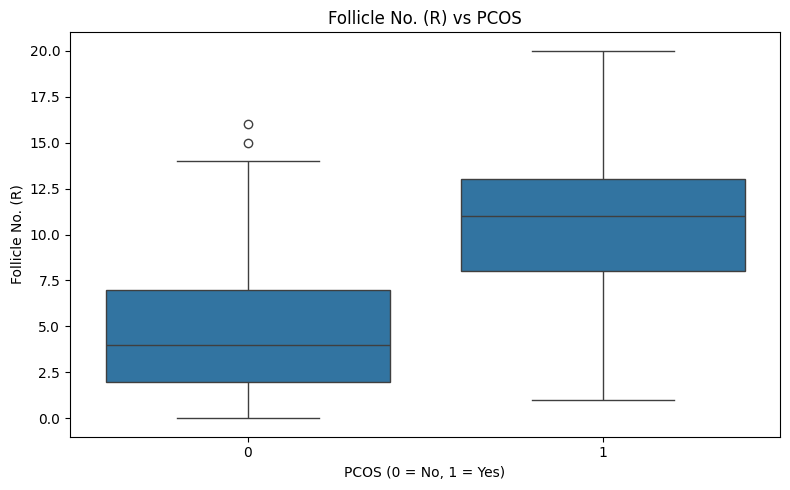

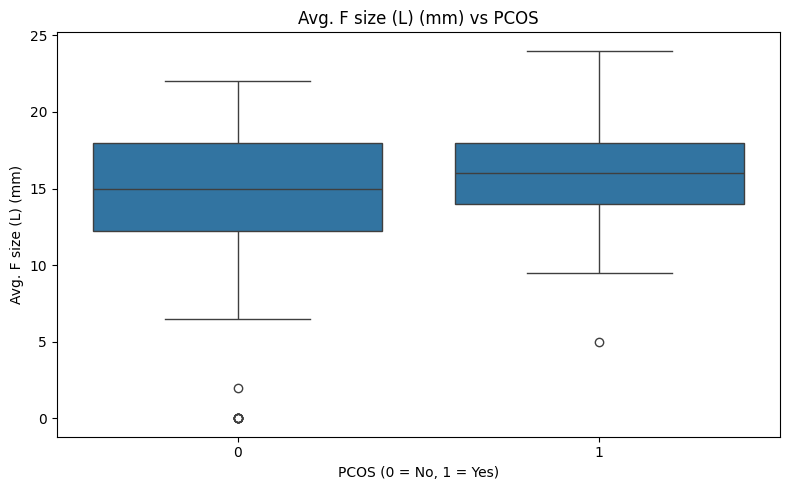

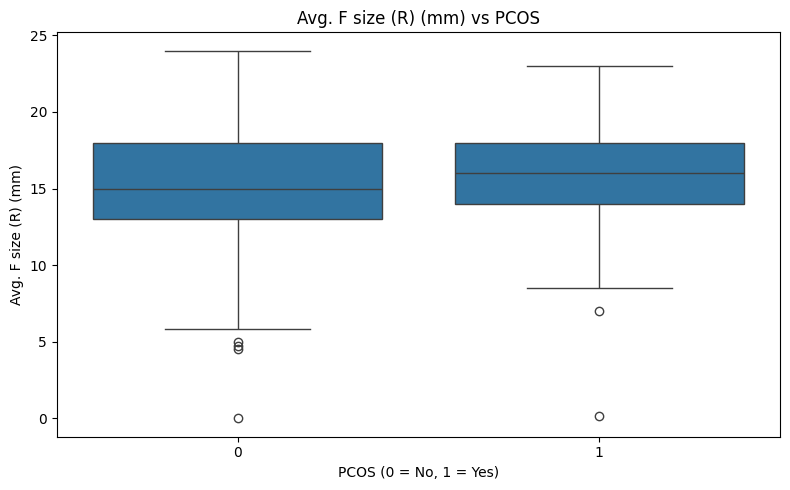

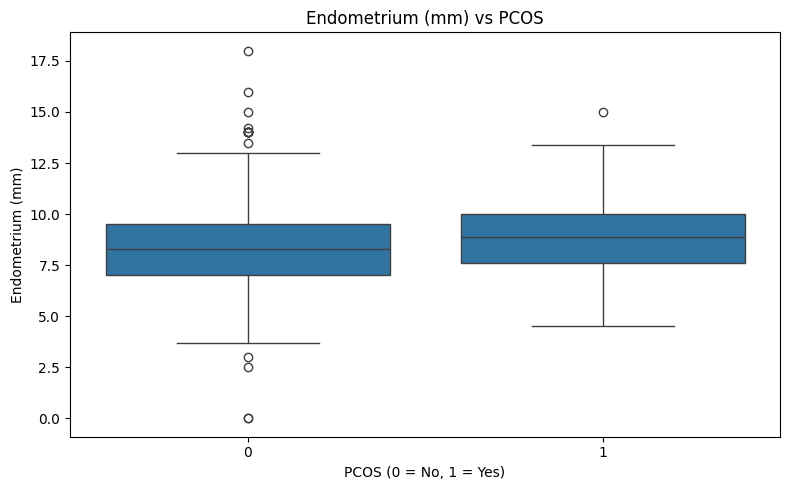

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target column
target_col = 'PCOS (Y/N)' if 'PCOS (Y/N)' in df.columns else 'pcos_(y/n)'

# Numerical columns except target
numerical_cols = df.select_dtypes(include='number').drop(columns=[target_col]).columns

# Boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f"{col} vs PCOS")
    plt.xlabel("PCOS (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


##### Plot Distribution of Continuous Features

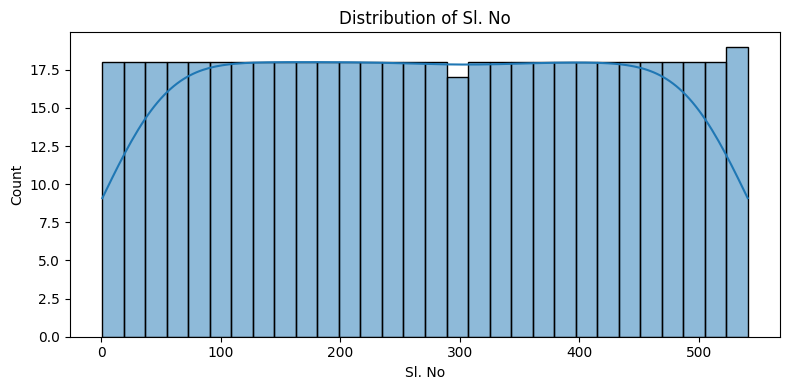

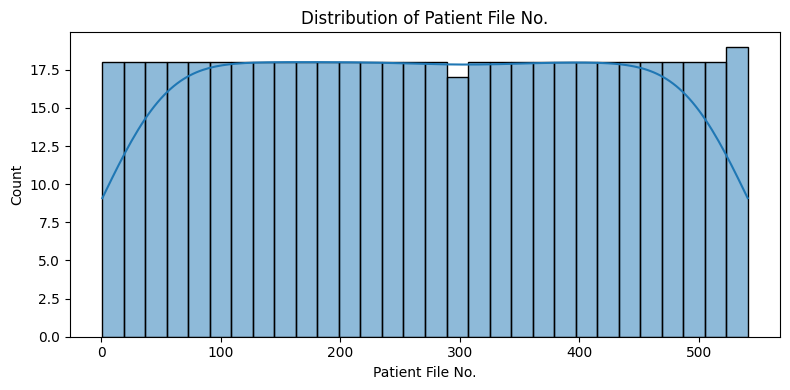

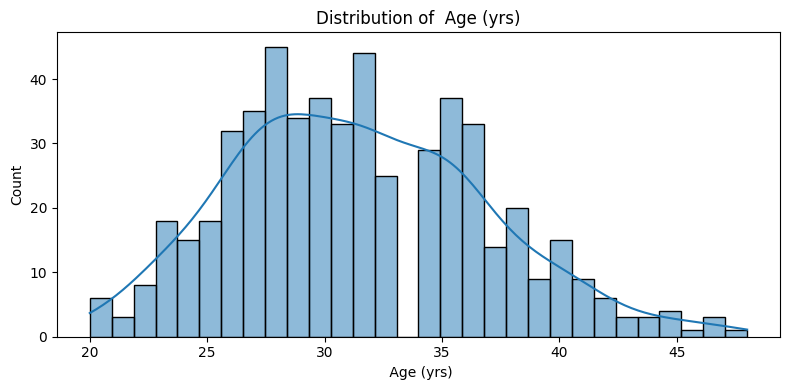

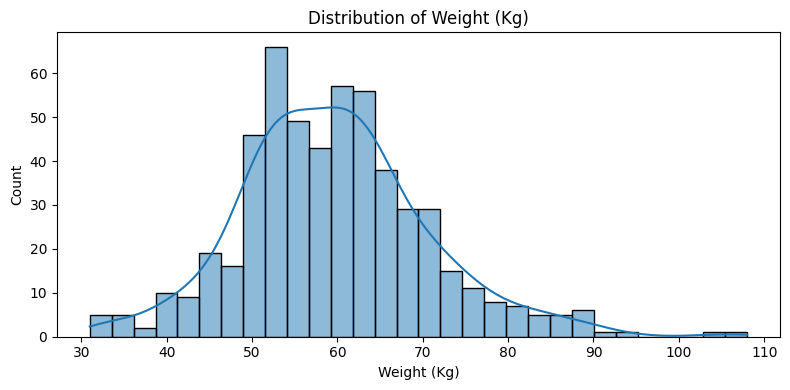

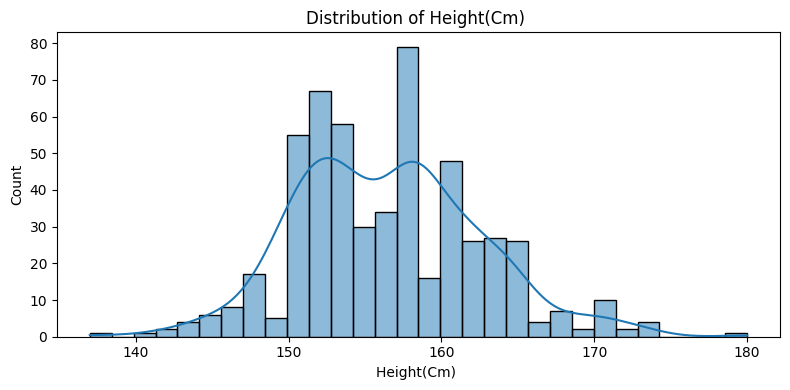

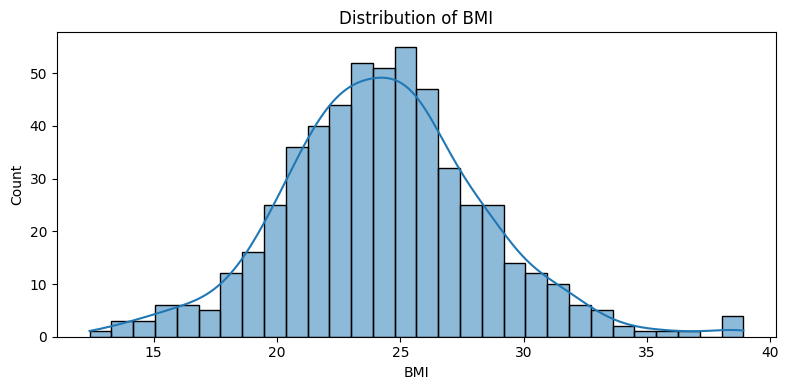

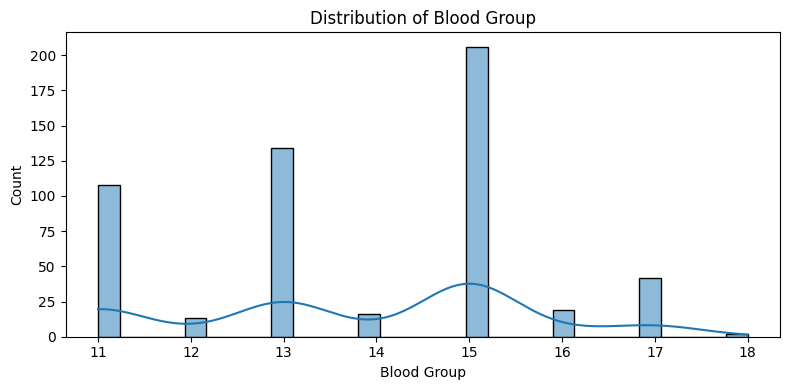

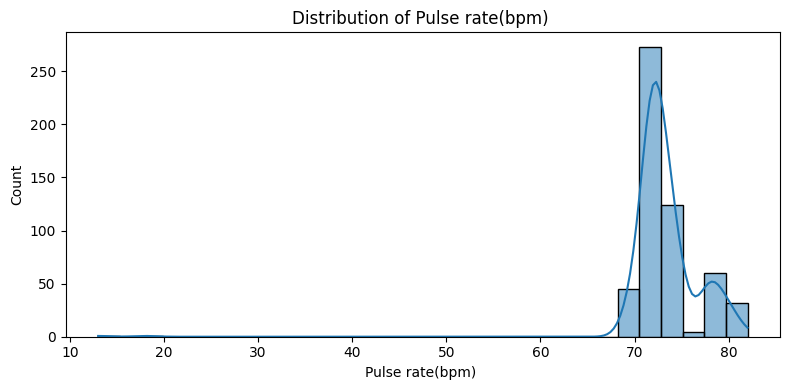

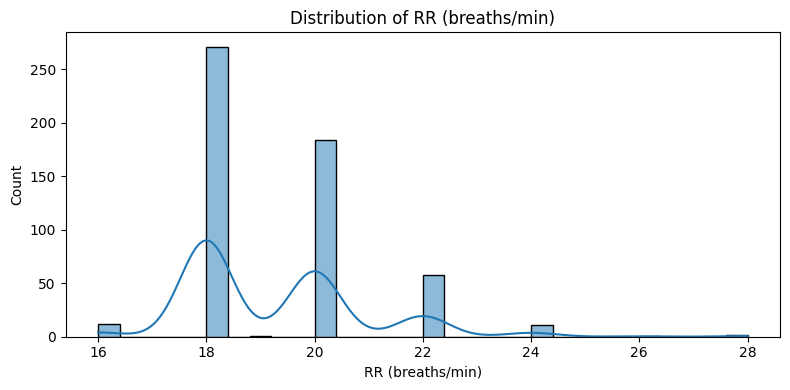

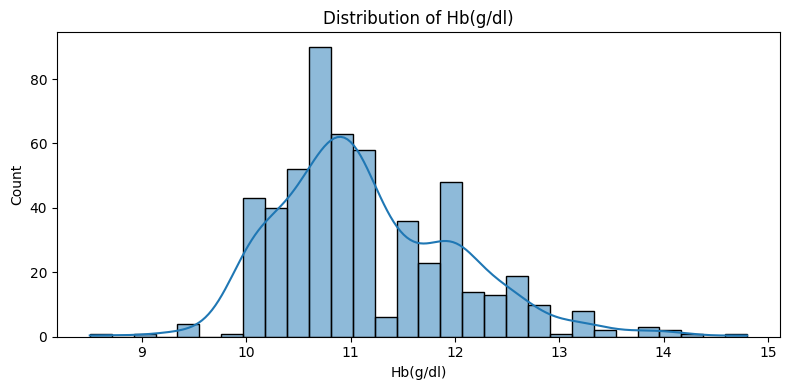

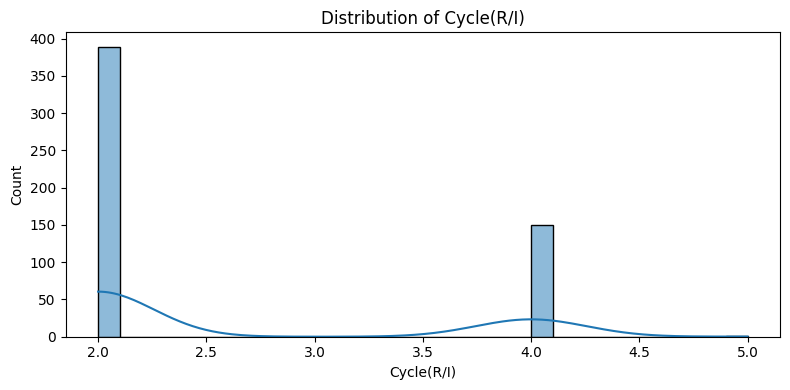

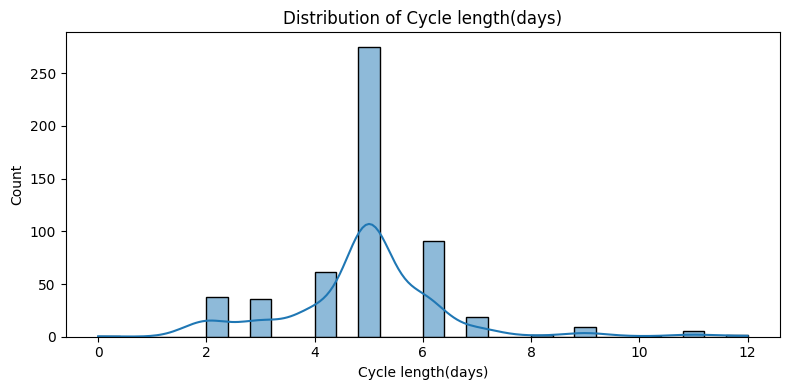

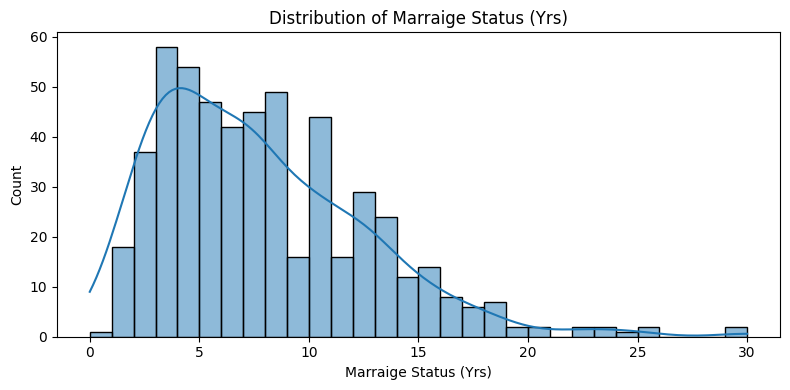

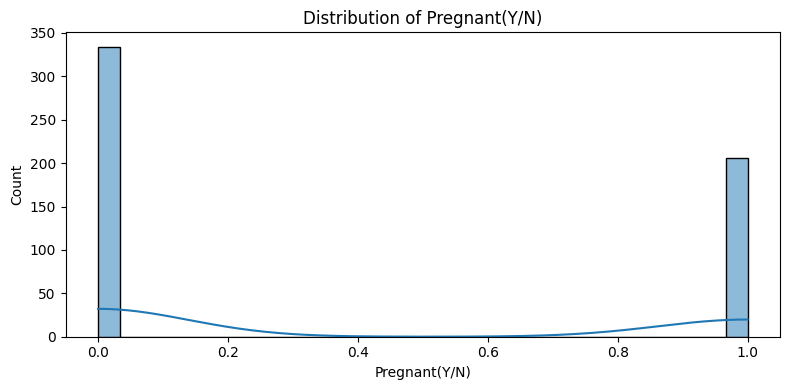

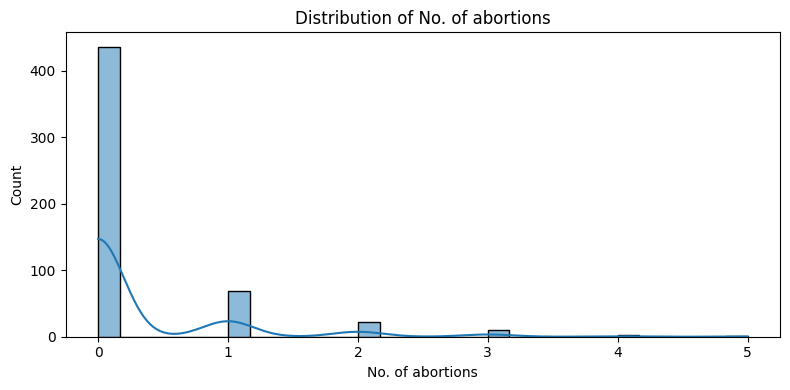

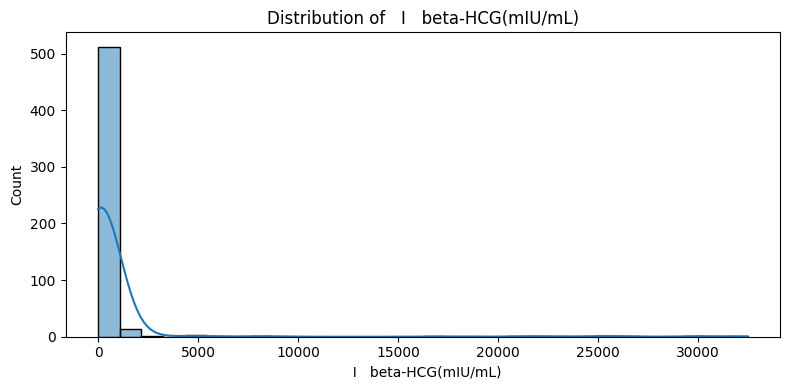

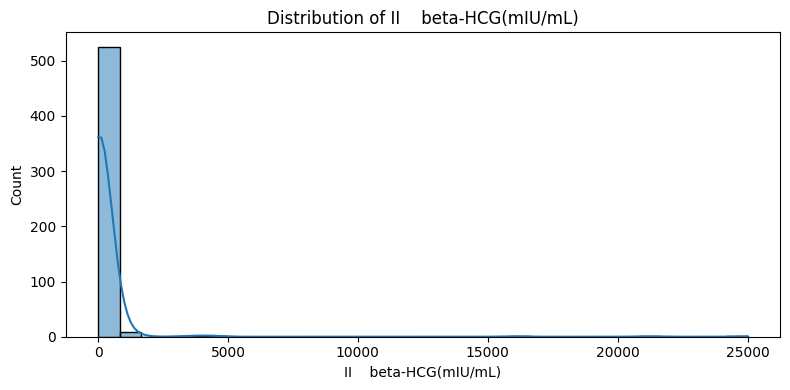

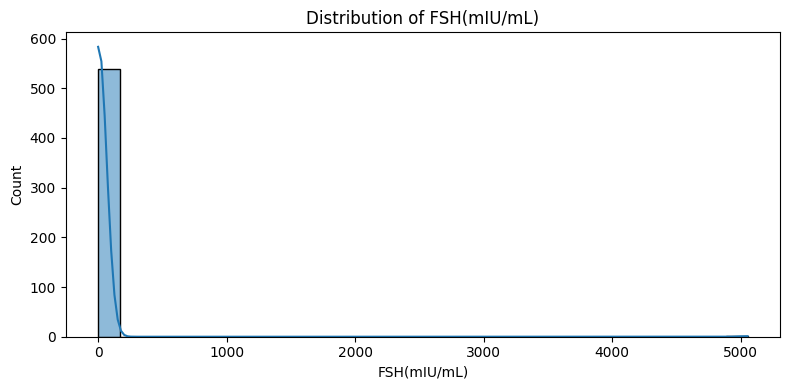

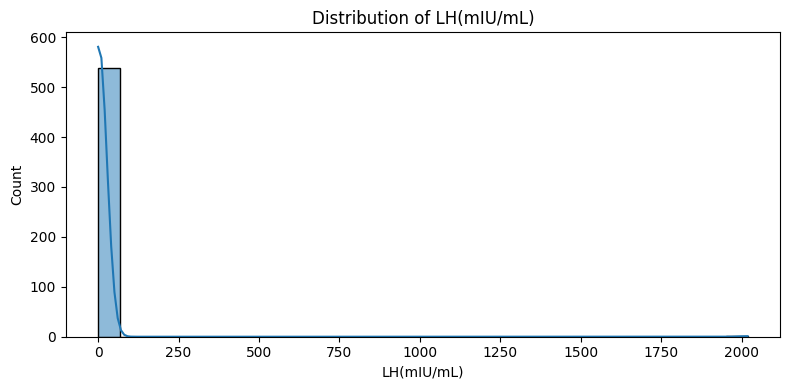

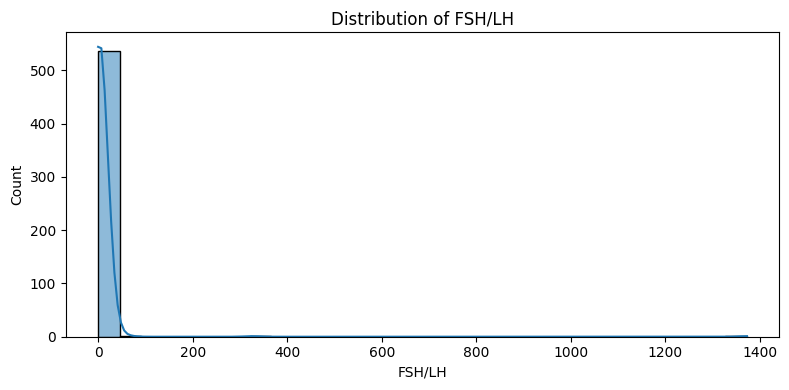

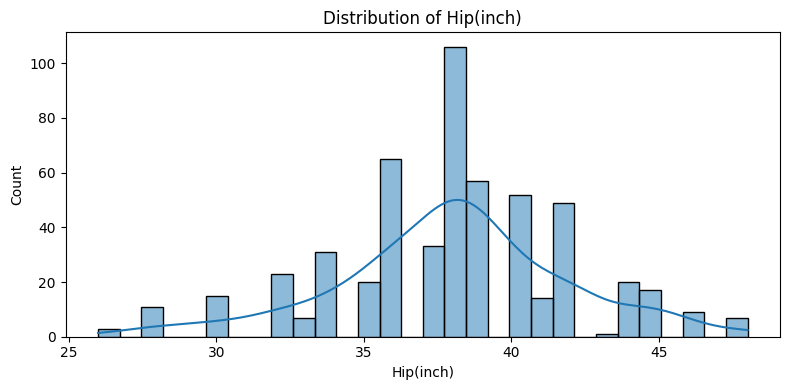

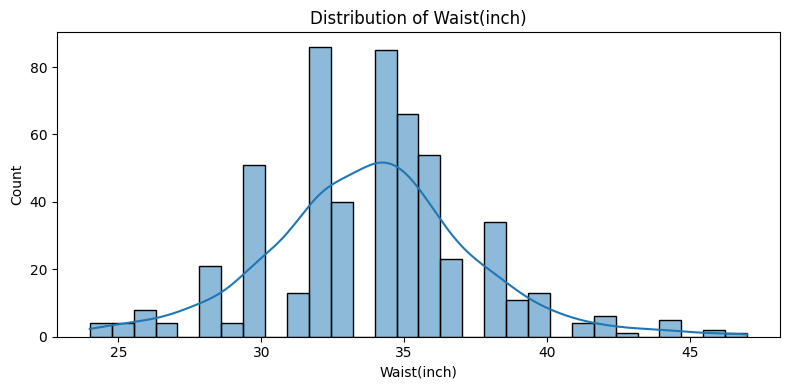

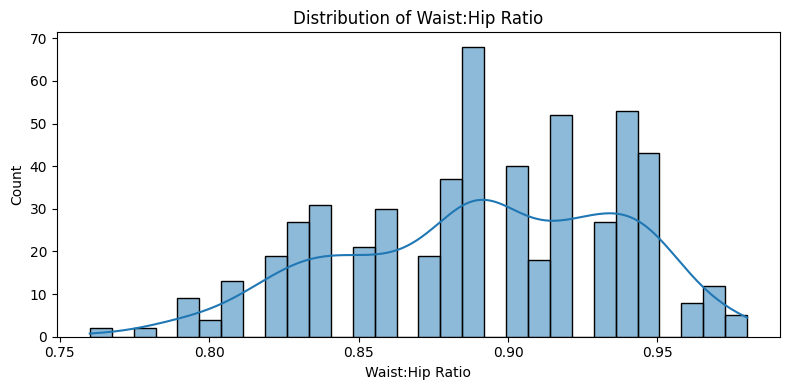

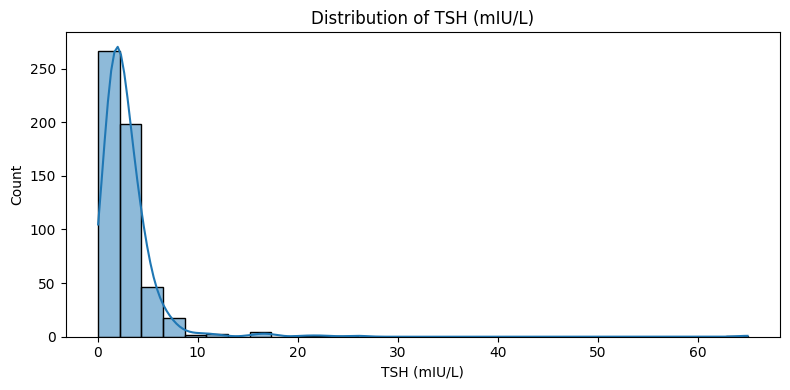

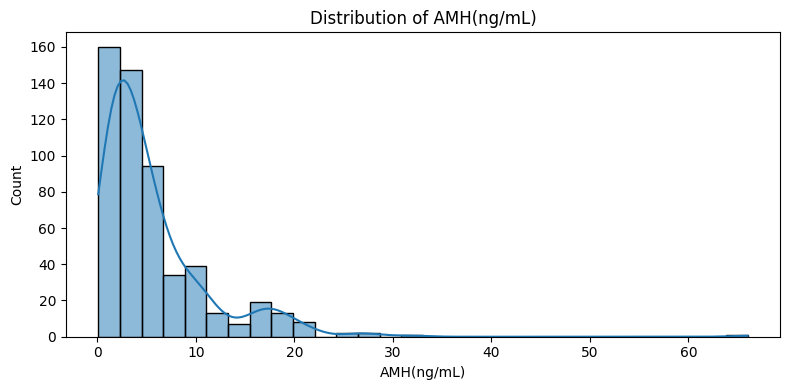

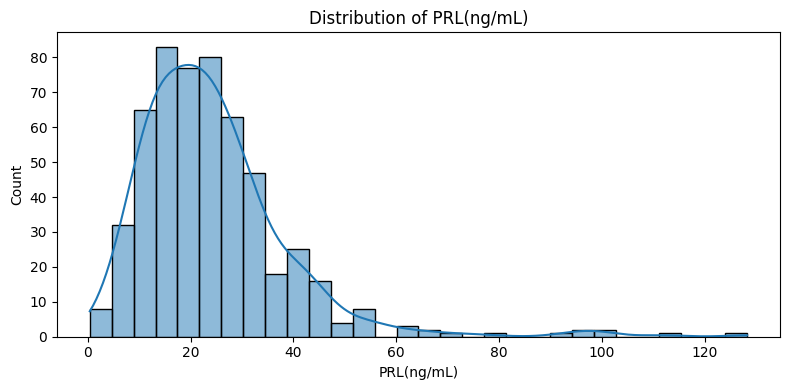

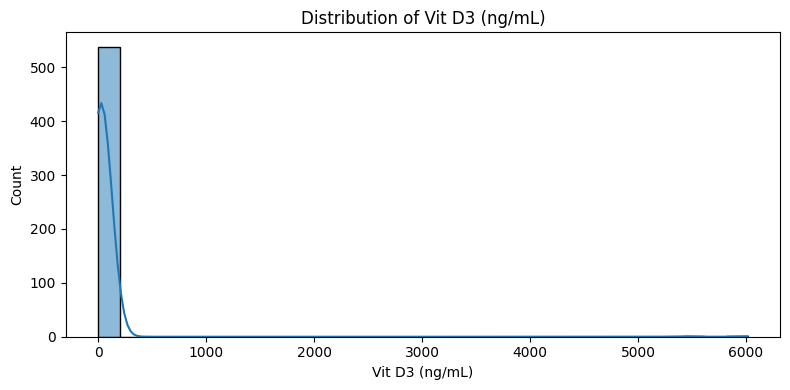

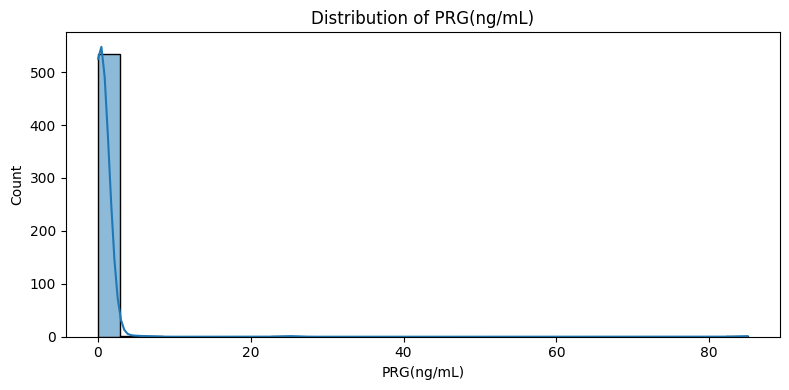

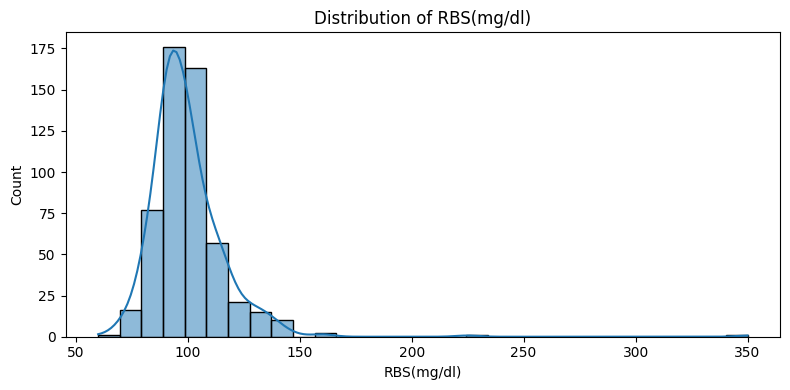

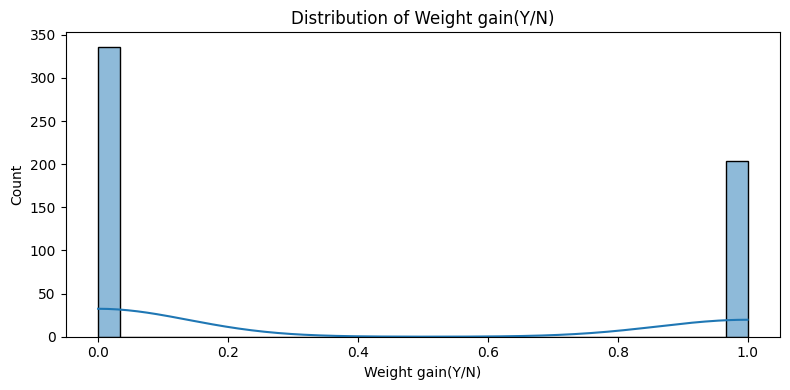

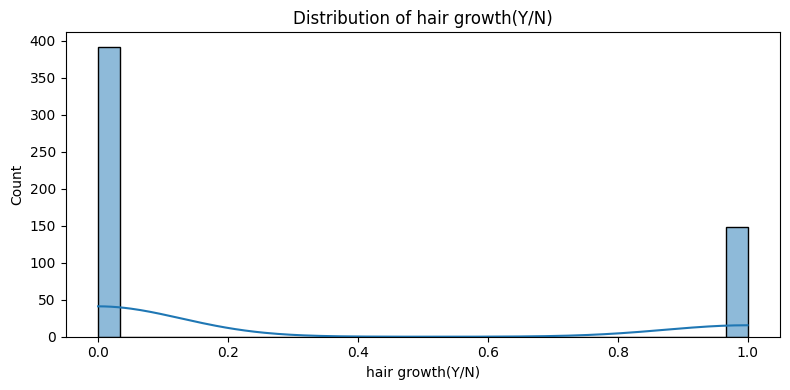

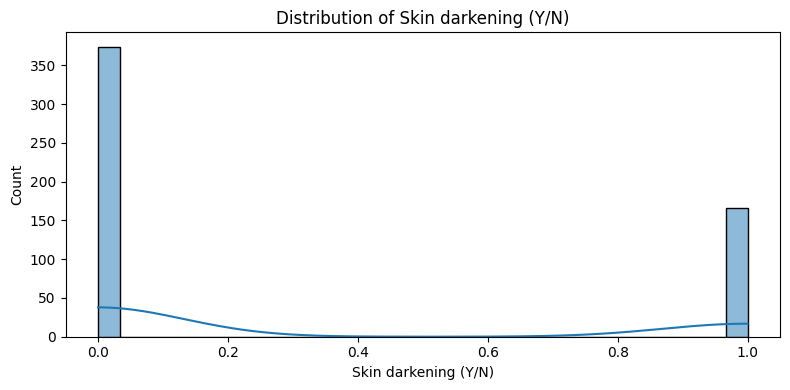

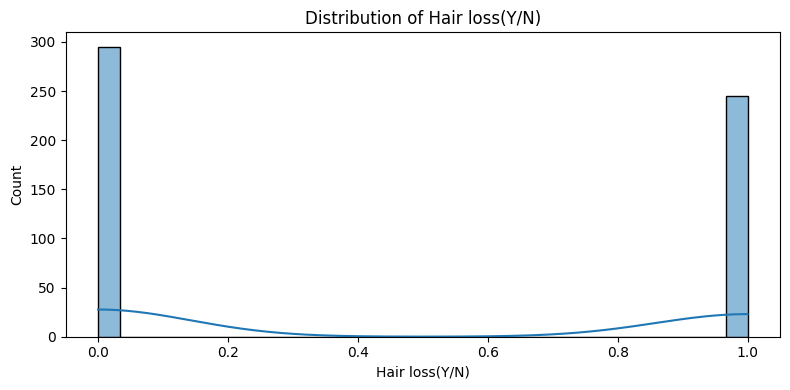

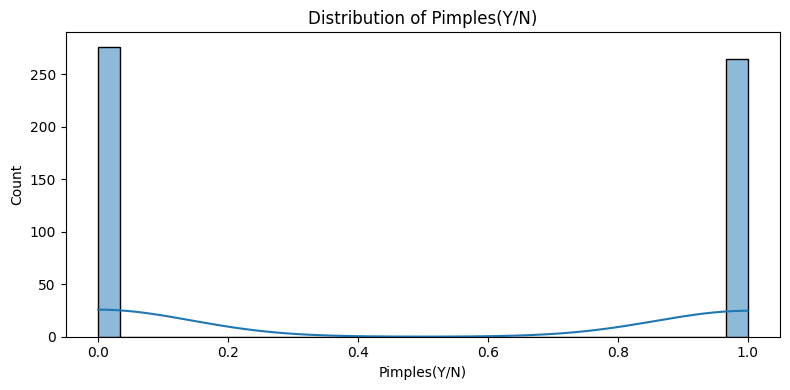

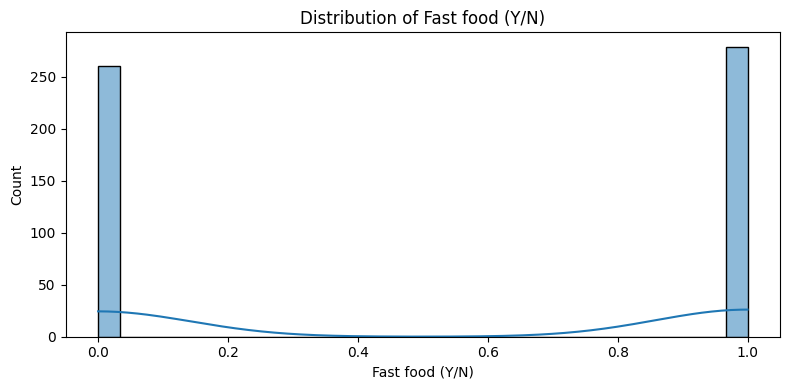

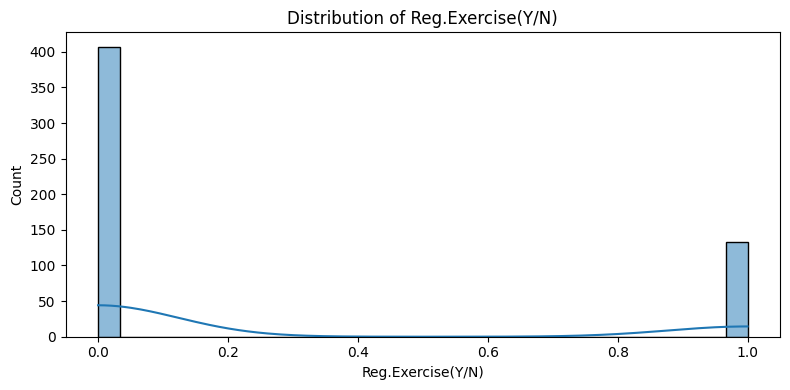

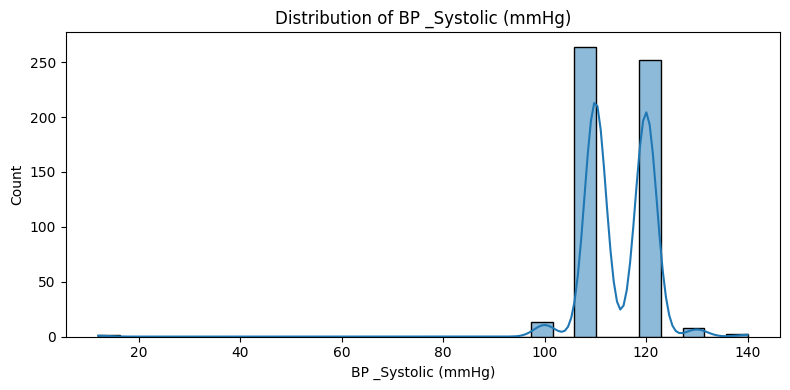

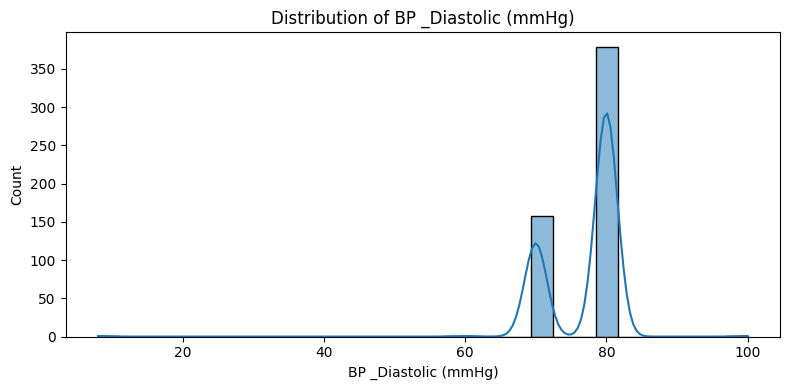

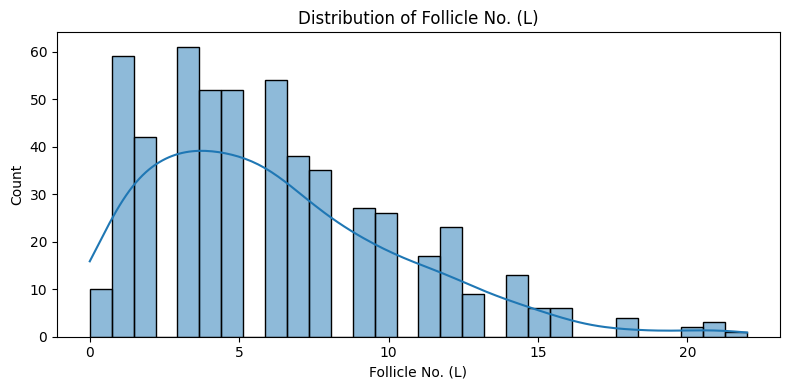

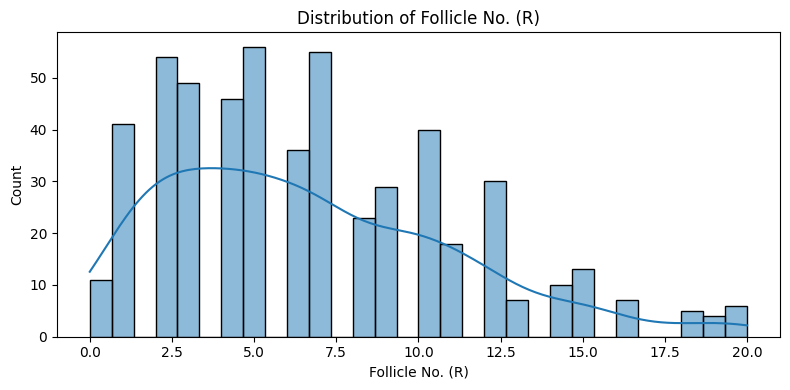

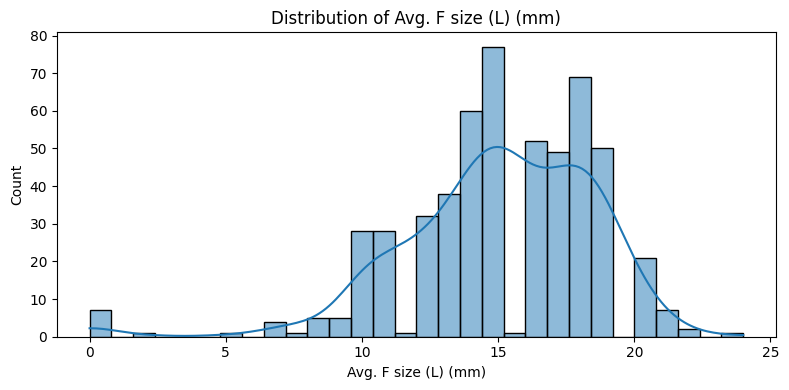

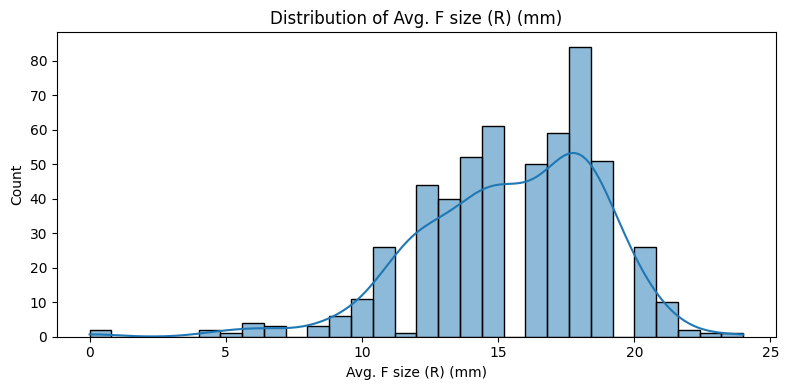

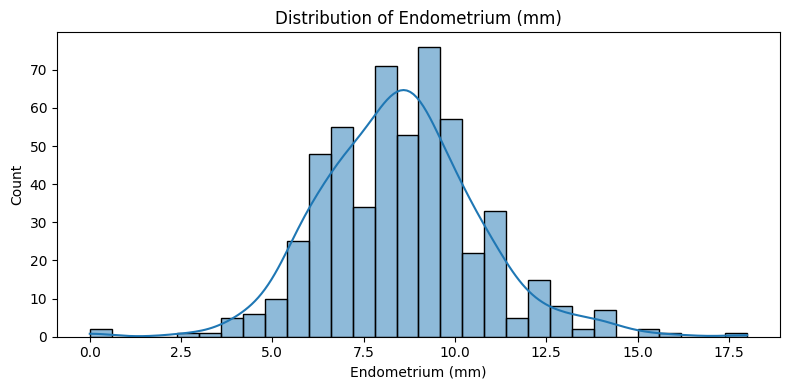

In [15]:
# Distribution plots
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


##### Identify Most Correlated Features with PCOS

In [16]:
# Get correlation with PCOS
corr_with_target = df.corr(numeric_only=True)[target_col].drop(target_col).sort_values(key=abs, ascending=False)

print("🔝 Top 5 features most correlated with PCOS:\n")
print(corr_with_target.head(5))


🔝 Top 5 features most correlated with PCOS:

Follicle No. (R)        0.648223
Follicle No. (L)        0.603109
Skin darkening (Y/N)    0.475283
hair growth(Y/N)        0.464245
Weight gain(Y/N)        0.440488
Name: PCOS (Y/N), dtype: float64
